In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [2]:
e1 = np.loadtxt('E1.csv', delimiter = ',')
e2 = np.transpose(np.loadtxt('E2.csv', delimiter = ','))

In [ ]:
y = []
x = np.linspace(1,100)

for i in range(len(x)):
    eps = i
    while 1+eps != eps:
        eps/=2
    y.append(eps)

In [3]:
print(e1)
e1 = sorted(e1, key=lambda x: x[0])
print(e1)

[[400.    40.15  41.83  40.91]
 [350.    35.83  35.9   36.43]
 [300.    30.27  30.26  30.81]
 [250.    25.56  25.65  25.4 ]
 [450.    46.07  46.28  46.25]
 [500.    51.03  50.58  50.39]
 [200.    20.94  20.64  20.87]
 [550.    55.21  56.25  55.83]]
[array([200.  ,  20.94,  20.64,  20.87]), array([250.  ,  25.56,  25.65,  25.4 ]), array([300.  ,  30.27,  30.26,  30.81]), array([350.  ,  35.83,  35.9 ,  36.43]), array([400.  ,  40.15,  41.83,  40.91]), array([450.  ,  46.07,  46.28,  46.25]), array([500.  ,  51.03,  50.58,  50.39]), array([550.  ,  55.21,  56.25,  55.83])]


In [4]:
def fprint(s, t):
    print(s.ljust(15) + str(t) + "\n")
    
def chi2(y,fit,z):
    return sum(list(map(lambda a,b,c: ((a-b)/c)**2 ,y,fit,z)))

[0.12439483138006217, 0.1164601346511456, 0.178906141335079, 0.1841698089224144, 0.4089915330102496, 0.1134313301811571, 0.18441097420546182, 0.2661383655725523]


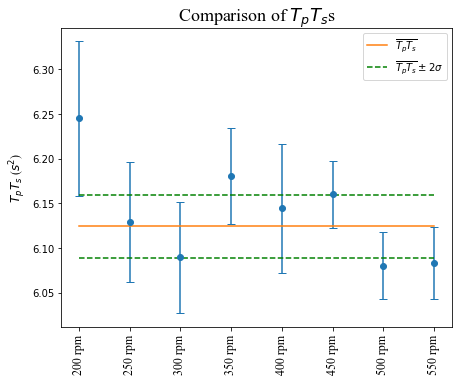

mean           6.1241903336005

mean err       0.01771255477664871

TpTs           [6.245, 6.128799999999998, 6.089333333333334, 6.180571428571429, 6.1445, 6.159999999999999, 6.079999999999999, 6.083272727272728]

err            [0.08652410399950217, 0.06736056420983026, 0.06209102139819896, 0.054274683959419874, 0.0723772524791615, 0.037415254035859505, 0.0376014184129624, 0.040093917053991755]



In [5]:
t = [60/e1[i][0] for i in range(len(e1))]
T = [np.mean(e1[i][1:]) for i in range (len(e1))]
ef = 2.5
#eT = .01
eT = [np.sqrt((np.std(e1[i][1:])/np.sqrt(3))**2 + .1**2) for i in range (len(e1))]
print(eT)
Tt = []

for i in range(len(T)):
    Tt.append(T[i]*t[i])

# differential error propagation
err = list(map(lambda a,b,st: np.sqrt((a * st)**2 + (a**2*b/60 * ef)**(2)), t,T,eT))
# weighted mean and error
m = sum(list(map(lambda a,x: x/a**2, err, Tt)))/sum([1/x**2 for x in err])
merr = np.sqrt(1/sum([1/x**2 for x in err]))

f=plt.figure(figsize=(7,5.5))
plt.errorbar(np.arange(len(Tt)),Tt, yerr = err, fmt='o', capsize = 4)
plt.plot(np.arange(len(Tt)),[m]*8, label = '$\overline{T_pT_s}$')
plt.plot(np.arange(len(Tt)),[m+2*merr]*8, 'g--', label = '$\overline{T_pT_s}\pm 2 \sigma$')
plt.plot(np.arange(len(Tt)),[m-2*merr]*8, 'g--')
plt.title('Comparison of $T_pT_s$s', fontname = 'Times New Roman', fontsize = 18)
plt.xticks(np.arange(len(Tt)), [str(int(e1[i][0]))+' rpm' for i in range(len(e1))], rotation = 'vertical', fontname = 'Times New Roman', fontsize = 12)
plt.ylabel('$T_pT_s$ ($s^2$)', fontname = 'Times New Roman', fontsize = 12)
plt.legend()
plt.savefig('TpTs.pdf')
plt.show()

fprint('mean', m)
fprint('mean err', merr)
fprint('TpTs',Tt)
fprint('err', err)

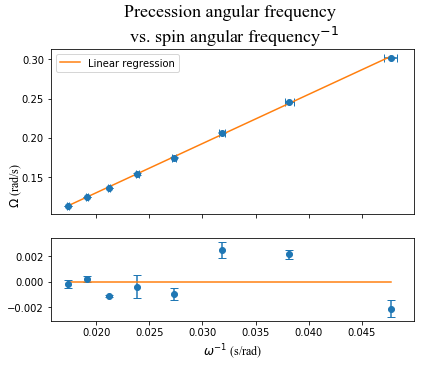

slope          6.288823395507757

slope err      0.0625024412043045

intercept      0.0036945053548917794

intercept err  0.0018728350196204934

1/w            [0.0477464829275686, 0.038197186342054885, 0.03183098861837907, 0.027283704530039202, 0.0238732414637843, 0.02122065907891938, 0.019098593171027443, 0.017362357428206764]

W              [0.30184584051326424, 0.24604967106609635, 0.20638154755335894, 0.17428431375447861, 0.15342865978298229, 0.13600023065852326, 0.12401370736544, 0.11268255237722602]



In [6]:
x = [60/(2*np.pi*e1[i][0]) for i in range(len(e1))]
y = [np.mean((2*np.pi)/e1[i][1:]) for i in range(len(e1))]
x_err = [(60*ef)/(2*np.pi*e1[i][0]**2) for i in range(len(e1))]
y_err = [np.std((2*np.pi)/e1[i][1:])/np.sqrt(len(e1)) for i in range(len(e1))]

hl = np.linspace(min(x),max(x))


par, cov = scipy.optimize.curve_fit(lambda x,a,b: a*x+b, x, y)
fit = np.polyval(par,x)
fity = np.polyval(par,hl)

f, (ax1,ax2) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':[2,1]}, figsize=(6.5,5))
f.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', bottom=False, left=False)
ax1.errorbar(x,y, xerr=x_err, yerr=y_err, fmt='o', capsize=4)
ax1.plot(hl,fity, label='Linear regression')
ax2.errorbar(x, y-fit, yerr=y_err, fmt='o', capsize=4)
ax2.plot(hl,[0]*len(hl))

plt.title('Precession angular frequency \n vs. spin angular frequency$^{-1}$', fontname = 'Times New Roman', fontsize = 18)
plt.xlabel('$\omega^{-1}$ (s/rad)', fontname = 'Times New Roman', fontsize = 12)
plt.ylabel('$\Omega$ (rad/s)', fontname = 'Times New Roman', fontsize = 12)
ax1.legend()
plt.savefig('w.pdf')
plt.show()

err_a = np.sqrt(cov[0][0])
err_b = np.sqrt(cov[1][1])

tag = ['slope', 'slope err', 'intercept', 'intercept err', '1/w', 'W']
key = [par[0], err_a, par[1], err_b, x, y]

for i in range(len(tag)):
    fprint(tag[i],key[i])

In [7]:
print(e2)

[[400.    27.94  27.78  27.75]
 [300.    20.5   20.22  20.51]
 [250.    17.09  17.07  17.19]
 [400.    28.57  28.95  28.46]
 [300.    21.35  21.19  21.2 ]
 [250.    17.59  17.63  17.56]
 [400.    29.21  29.07  28.96]
 [500.    35.78  35.02  35.37]
 [450.    32.27  32.28  32.58]
 [450.    33.72  34.19  33.53]
 [500.    36.87  37.22  37.4 ]
 [400.    29.94  30.06  29.66]
 [500.    39.44  39.53  39.26]
 [450.    35.52  35.57  35.39]
 [400.    31.26  31.44  31.68]]


[0.0011352498958904637, 0.0011569954556957822, 0.000879322516595707, 0.0008674576398871702, 0.0007155712499696358]
9.432796075584829
3
7.898979485566356
10.348469228349533


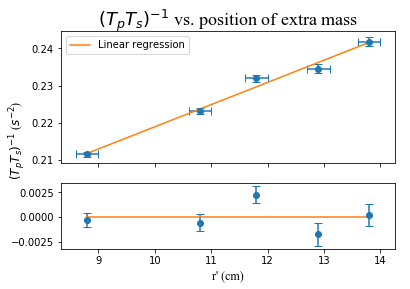

slope          0.005964004498435073

slope err      0.0004337114534959645

intercept      0.15931127753650215

intercept err  0.005095583592118249

1/m            0.16328689108721506

r'             [13.8, 12.9, 11.8, 10.8, 8.8]

1/TpTs         [0.24185709981889902, 0.23454440555375922, 0.2319610616253894, 0.22319451579417698, 0.2115079662692689]



In [8]:
r = [13.8, 12.9, 11.8, 10.8, 8.8]
rerr = .2

t = [60/e2[i][0] for i in range(len(e2))]
T = [np.mean(e2[i][1:]) for i in range(len(e2))]
eT = [np.std(e2[i][1:])/np.sqrt(3) for i in range(len(e2))]

Tt = [t[i]*T[i] for i in range(len(e2))]
eTt = list(map(lambda a,b,st: np.sqrt((a * st)**2 + (a**2*b/60 * ef)**(2)), t,T,eT))

Ttm = [sum(list(map(lambda a,x: x/a**2, eTt[i:i+3], Tt[i:i+3])))/sum([1/x**2 for x in eTt[i:i+3]]) for i in range(0,len(Tt),3)]
eTtm = [np.sqrt(1/sum([1/x**2 for x in eTt[i:i+3]])) for i in range(0,len(Tt),3)]

y = [1/x for x in Ttm]
y_err = list(map(lambda a,b: a/b**2, eTtm, Ttm))

hl = np.linspace(min(r),max(r))

par, cov = scipy.optimize.curve_fit(lambda x,a,b: a*x+b, r, y)
b = par[1]
fit = np.polyval(par,r)
fity = np.polyval(par,hl)

chisqr = chi2(y,fit,y_err)
print(y_err)
print(chisqr)
print(len(y)-2)
print(3+2*np.sqrt(2*3))
print(3+3*np.sqrt(2*3))

f, (ax1,ax2) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':[2,1]})
f.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', left=False, bottom=False)
ax1.errorbar(r,y,xerr=rerr,yerr=y_err,fmt='o', capsize = 4)
ax1.plot(hl, fity, label = 'Linear regression')
ax2.errorbar(r, y-fit, yerr=y_err, fmt='o', capsize=4)
ax2.plot(hl,[0]*len(hl))

plt.xlabel('r\' (cm)', fontname='Times New Roman', fontsize=12)
plt.ylabel('$(T_pT_s)^{-1}$ ($s^{-2}$)', fontname='Times New Roman', fontsize=12, labelpad = 10)
plt.title('$(T_pT_s)^{-1}$ vs. position of extra mass', fontname='Times New Roman', fontsize=18)
ax1.legend()
plt.savefig('r.pdf')
plt.show()

erra = np.sqrt(cov[0][0])
errb = np.sqrt(cov[1][1])

tag = ['slope', 'slope err', 'intercept', 'intercept err', '1/m', 'r\'', '1/TpTs']
key = [par[0], erra, par[1], errb, 1/m, r, y]

for i in range(len(tag)):
    fprint(tag[i],key[i])

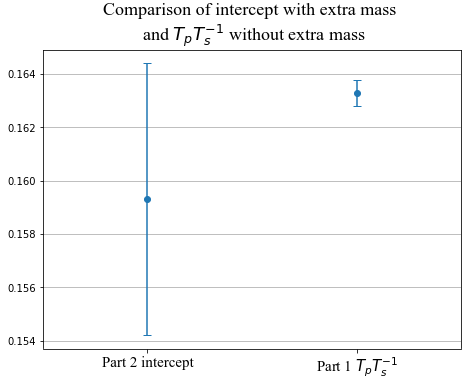

intercept      0.15931127753650215

err            0.005095583592118249

1/TpTs         0.16328689108721506

err            0.0004722629188747937



In [9]:
s = m**(-2)*merr

plt.figure(figsize=(7.5,5.5))
plt.errorbar([0.5,1.5], [b,1/m], yerr=[errb,s] , fmt='o', capsize = 4)
plt.grid(axis = 'y')
plt.xlim(0,2)
plt.xticks([0.5,1.5], ['Part 2 intercept','Part 1 $T_pT_s^{-1}$'], fontname = 'Times New Roman', fontsize = 15)
plt.title('Comparison of intercept with extra mass \n and $T_pT_s^{-1}$ without extra mass', fontname = 'Times New Roman', fontsize = 18)
plt.savefig('intercept.pdf')
plt.show()

fprint('intercept', b)
fprint('err', errb)
fprint('1/TpTs',1/m)
fprint('err',s)

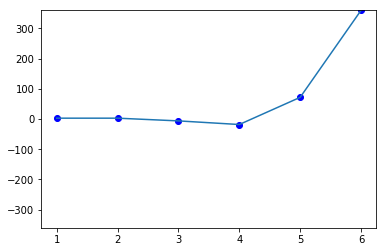

In [31]:
x = range(1,7)
y = [3,3,-6,-18,72,360]
plt.ylim(top=360,bottom=-360)
plt.plot(x,y,'bo')
plt.plot(x,y)

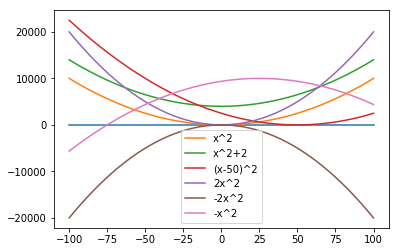

In [27]:
x=np.linspace(-100,100)
y=list(map(lambda x: x**2,x))
y2=list(map(lambda x: x**2+4000,x))
y3=list(map(lambda x: (x-50)**2,x))
y4=list(map(lambda x: 2*x**2,x))

plt.plot(x,x*0)
plt.plot(x,y,label="x^2")
plt.plot(x,y2,label="x^2+2")
plt.plot(x,y3,label="(x-50)^2")
plt.plot(x,y4,label="2x^2")
plt.plot(x,list(map(lambda x: -2*(x)**2,x)),label="-2x^2")
plt.plot(x,list(map(lambda x: -1*(x-25)**2+10000,x)),label="-x^2")
plt.legend()
plt.show()